<h1><center><u>Bike Counter</u></center></h1>


<h1><font color='blue'>Initial import and cleanup of first data source from NY Open Data Source Bike</font></h1>

### All imports for notebook contained in the below cell.

In [2]:
import pandas as pd
import numpy as np
import os
import glob
import xlrd
pd.options.display.max_rows = 400
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white", color_codes=True)


### Creates a list of files to be used in for loop

In [3]:
glob.glob("/Users/macbookair/NYCDOT_20Bicycle_20Counts_20-_20East_20River_20Bridges/*")

['/Users/macbookair/NYCDOT_20Bicycle_20Counts_20-_20East_20River_20Bridges/09 September 2016 Cyclist Numbers for Web.csv',
 '/Users/macbookair/NYCDOT_20Bicycle_20Counts_20-_20East_20River_20Bridges/~$04 April 2016 Cyclist Numbers for Web.xlsx',
 '/Users/macbookair/NYCDOT_20Bicycle_20Counts_20-_20East_20River_20Bridges/05 May 2016 Cyclist Numbers for Web.csv',
 '/Users/macbookair/NYCDOT_20Bicycle_20Counts_20-_20East_20River_20Bridges/10 October 2016 Cyclist Numbers for Web.csv',
 '/Users/macbookair/NYCDOT_20Bicycle_20Counts_20-_20East_20River_20Bridges/04 April 2016 Cyclist Numbers for Web.csv',
 '/Users/macbookair/NYCDOT_20Bicycle_20Counts_20-_20East_20River_20Bridges/07 July 2016 Cyclist Numbers for Web.csv',
 '/Users/macbookair/NYCDOT_20Bicycle_20Counts_20-_20East_20River_20Bridges/08 August 2016 Cyclist Numbers for Web.csv',
 '/Users/macbookair/NYCDOT_20Bicycle_20Counts_20-_20East_20River_20Bridges/06 June 2016 Cyclist Numbers for Web.csv']

### Creates empty dataframe and for loop to parse and read data from each file as well as concatenate to one dataframe for further manipulation.

In [4]:
all_data = pd.DataFrame()
for f in glob.glob("/Users/macbookair/NYCDOT_20Bicycle_20Counts_20-_20East_20River_20Bridges/*"):
    dateparse = lambda x: pd.datetime.strptime(x, '%m-%d %M:%S')
    df = pd.read_csv(f, error_bad_lines=False,  thousands=',')
    all_data = all_data.append(df,ignore_index=True, sort=True)


### Transforms the 'Date' column to datetime format

In [5]:
all_data['Date'] = pd.to_datetime(all_data['Date'], format = "%m/%d")

### Sets the dataframe to the columns that will be used. 

In [6]:
all_data = all_data[['Date', 'Brooklyn Bridge','Day', 'High Temp (°F)', 'Low Temp (°F)', 'Manhattan Bridge', 'Williamsburg Bridge', 'Precipitation', 'Queensboro Bridge', 'Total']]

### Repair the Date column year to 2016

### There was no year given in the initial datasource. The default was 1900 which makes the data unclear. The correct year of the datasource is 2016. The following codes achieves this task:

In [7]:
all_data['Date'] = all_data['Date'].mask(all_data['Date'].dt.year == 1900, 
                             all_data['Date'] + pd.offsets.DateOffset(year=2016))

all_data.head()

,Date,Brooklyn Bridge,Day,High Temp (°F),Low Temp (°F),Manhattan Bridge,Williamsburg Bridge,Precipitation,Queensboro Bridge,Total
0,2016-09-01,1608.0,Thursday,78.1,70.0,3012.0,4435.0,T,3498.0,12553.0
1,2016-09-02,3594.0,Friday,80.1,66.0,6657.0,7116.0,0.00,5376.0,22743.0
2,2016-09-03,2850.0,Saturday,73.9,68.0,7357.0,5115.0,0.00,3961.0,19283.0
3,2016-09-04,2871.0,Sunday,79.0,64.9,6949.0,4800.0,0.00,3275.0,17895.0
4,2016-09-05,2465.0,Monday,82.9,66.0,6248.0,4904.0,0.00,3583.0,17200.0


### Set index to date

In [8]:
all_data.index = all_data['Date']
del all_data['Date']

### Drops all rows that have Nan value in 'Total' column.

In [9]:
all_data.dropna(subset=['Total'], inplace=True)


### To make the data more user-friendly the 'Date' column will be sorted ascending from the earliest date.

In [10]:
all_data.sort_values(by='Date').head()

,Brooklyn Bridge,Day,High Temp (°F),Low Temp (°F),Manhattan Bridge,Williamsburg Bridge,Precipitation,Queensboro Bridge,Total
Date,,,,,,,,,
2016-04-01,1704.0,Friday,78.1,66.0,3126.0,4115.0,0.01,2552.0,11497.0
2016-04-02,827.0,Saturday,55.0,48.9,1646.0,2565.0,0.15,1884.0,6922.0
2016-04-03,526.0,Sunday,39.9,34.0,1232.0,1695.0,0.09,1306.0,4759.0
2016-04-04,521.0,Monday,44.1,33.1,1067.0,1440.0,0.47 (S),1307.0,4335.0
2016-04-05,1416.0,Tuesday,42.1,26.1,2617.0,3081.0,0.00,2357.0,9471.0


In [11]:
all_data['Precipitation'] = all_data['Precipitation'].replace("T", 0)
all_data['Precipitation'] = all_data['Precipitation'].replace("0.47 (S)", 0.47)

In [12]:
all_data['Precipitation'] = all_data['Precipitation'].convert_objects(convert_numeric=True)

### Change datatype to float

In [22]:
all_data[['Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge']].astype(float).head()

,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge
Date,,,
2016-09-01,3012.0,4435.0,3498.0
2016-09-02,6657.0,7116.0,5376.0
2016-09-03,7357.0,5115.0,3961.0
2016-09-04,6949.0,4800.0,3275.0
2016-09-05,6248.0,4904.0,3583.0


In [14]:
all_data.dtypes # check to verify the datatypes were changed correctly

Brooklyn Bridge        float64
Day                     object
High Temp (°F)         float64
Low Temp (°F)          float64
Manhattan Bridge       float64
Williamsburg Bridge    float64
Precipitation          float64
Queensboro Bridge      float64
Total                  float64
dtype: object

### ***The data is now tranformed correctly so that analysis can be done.

<h1 align="center"><font color='blue'>Data Grouping and Preliminary Analysis</font></h1>

### Verify the correct number of days for each month

In [15]:
all_data.resample('M').size()

Date
2016-04-30    30
2016-05-31    31
2016-06-30    30
2016-07-31    31
2016-08-31    31
2016-09-30    30
2016-10-31    31
Freq: M, dtype: int64

### Basic statistical description of 'all_data' dataframe.

In [16]:
all_data.describe().round()

,Brooklyn Bridge,High Temp (°F),Low Temp (°F),Manhattan Bridge,Williamsburg Bridge,Precipitation,Queensboro Bridge,Total
count,214.0,214.0,214.0,214.0,214.0,214.0,214.0,214.0
mean,3031.0,75.0,62.0,5052.0,6161.0,0.0,4301.0,18545.0
std,1134.0,13.0,12.0,1745.0,1911.0,0.0,1261.0,5702.0
min,504.0,40.0,26.0,997.0,1440.0,0.0,1306.0,4335.0
25%,2388.0,66.0,53.0,3713.0,4884.0,0.0,3496.0,14826.0
50%,3076.0,78.0,65.0,5132.0,6334.0,0.0,4342.0,19002.0
75%,3685.0,85.0,71.0,6610.0,7858.0,0.0,5308.0,23254.0
max,8264.0,96.0,82.0,9152.0,9148.0,2.0,6392.0,28437.0


<h1 align="center"><font color="blue">Charts</font></h1>

## Total pedestrian cyclists aggregated by month

[Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'June'),
 Text(0,0,'July'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct')]

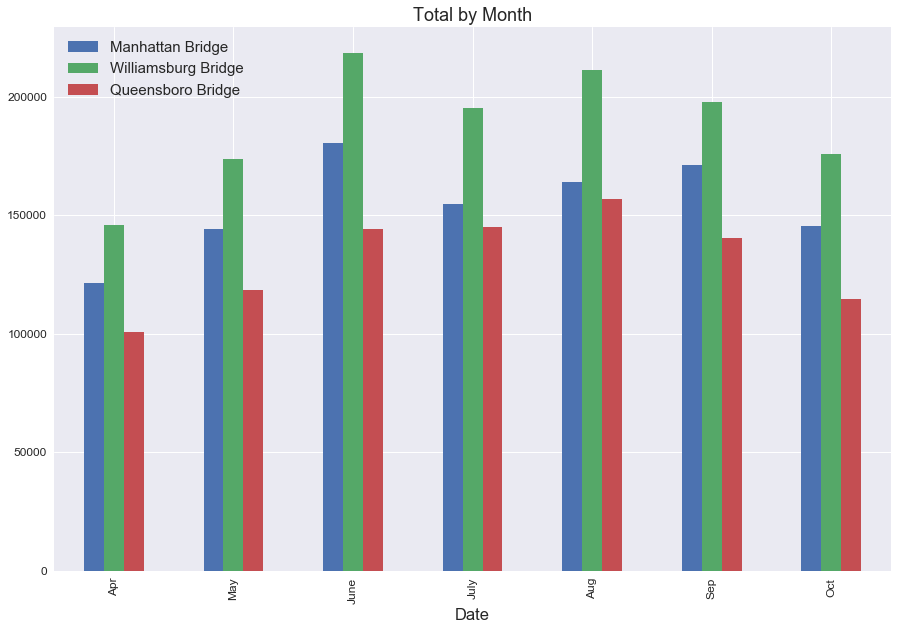

In [39]:

ttl_month = all_data[['Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge']].resample('M').sum().round()
ax1 = ttl_month.plot(kind='bar', title ="Total by Month", figsize=(15, 10), legend=True, fontsize=12)
ax1.set_xticklabels(['Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct'])


## Median monthly pedestrian cyclists

[Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'June'),
 Text(0,0,'July'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct')]

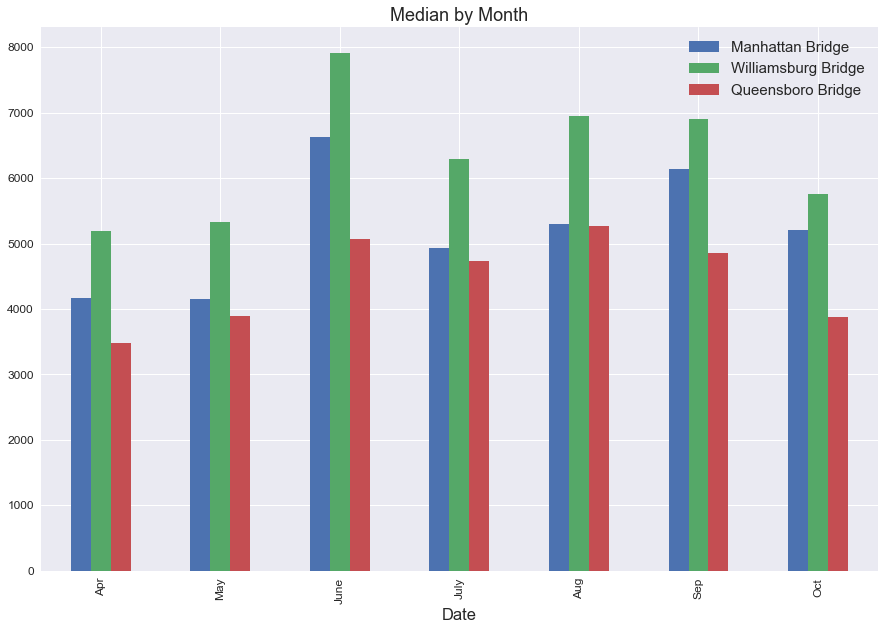

In [40]:
med_month = all_data[['Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge']].resample('M').median().round()
ax2 = med_month.plot(kind='bar', title ="Median by Month", figsize=(15, 10), legend=True, fontsize=12)
ax2.set_xticklabels(['Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct'])

## Mean pedestrian cyclists by month

[Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'June'),
 Text(0,0,'July'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct')]

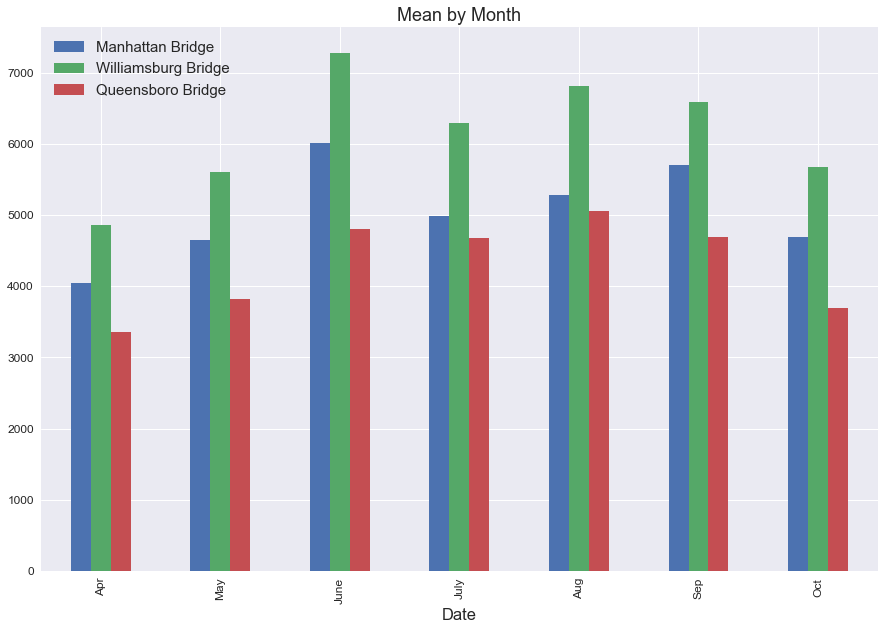

In [41]:
mean_month = all_data[['Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge']].resample('M').mean().round()
ax3 = mean_month.plot(kind='bar', title ="Mean by Month", figsize=(15, 10), legend=True, fontsize=12)
ax3.set_xticklabels(['Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct'])

## Seaborn pairplot to show temperature and precipitation impact on cyclists

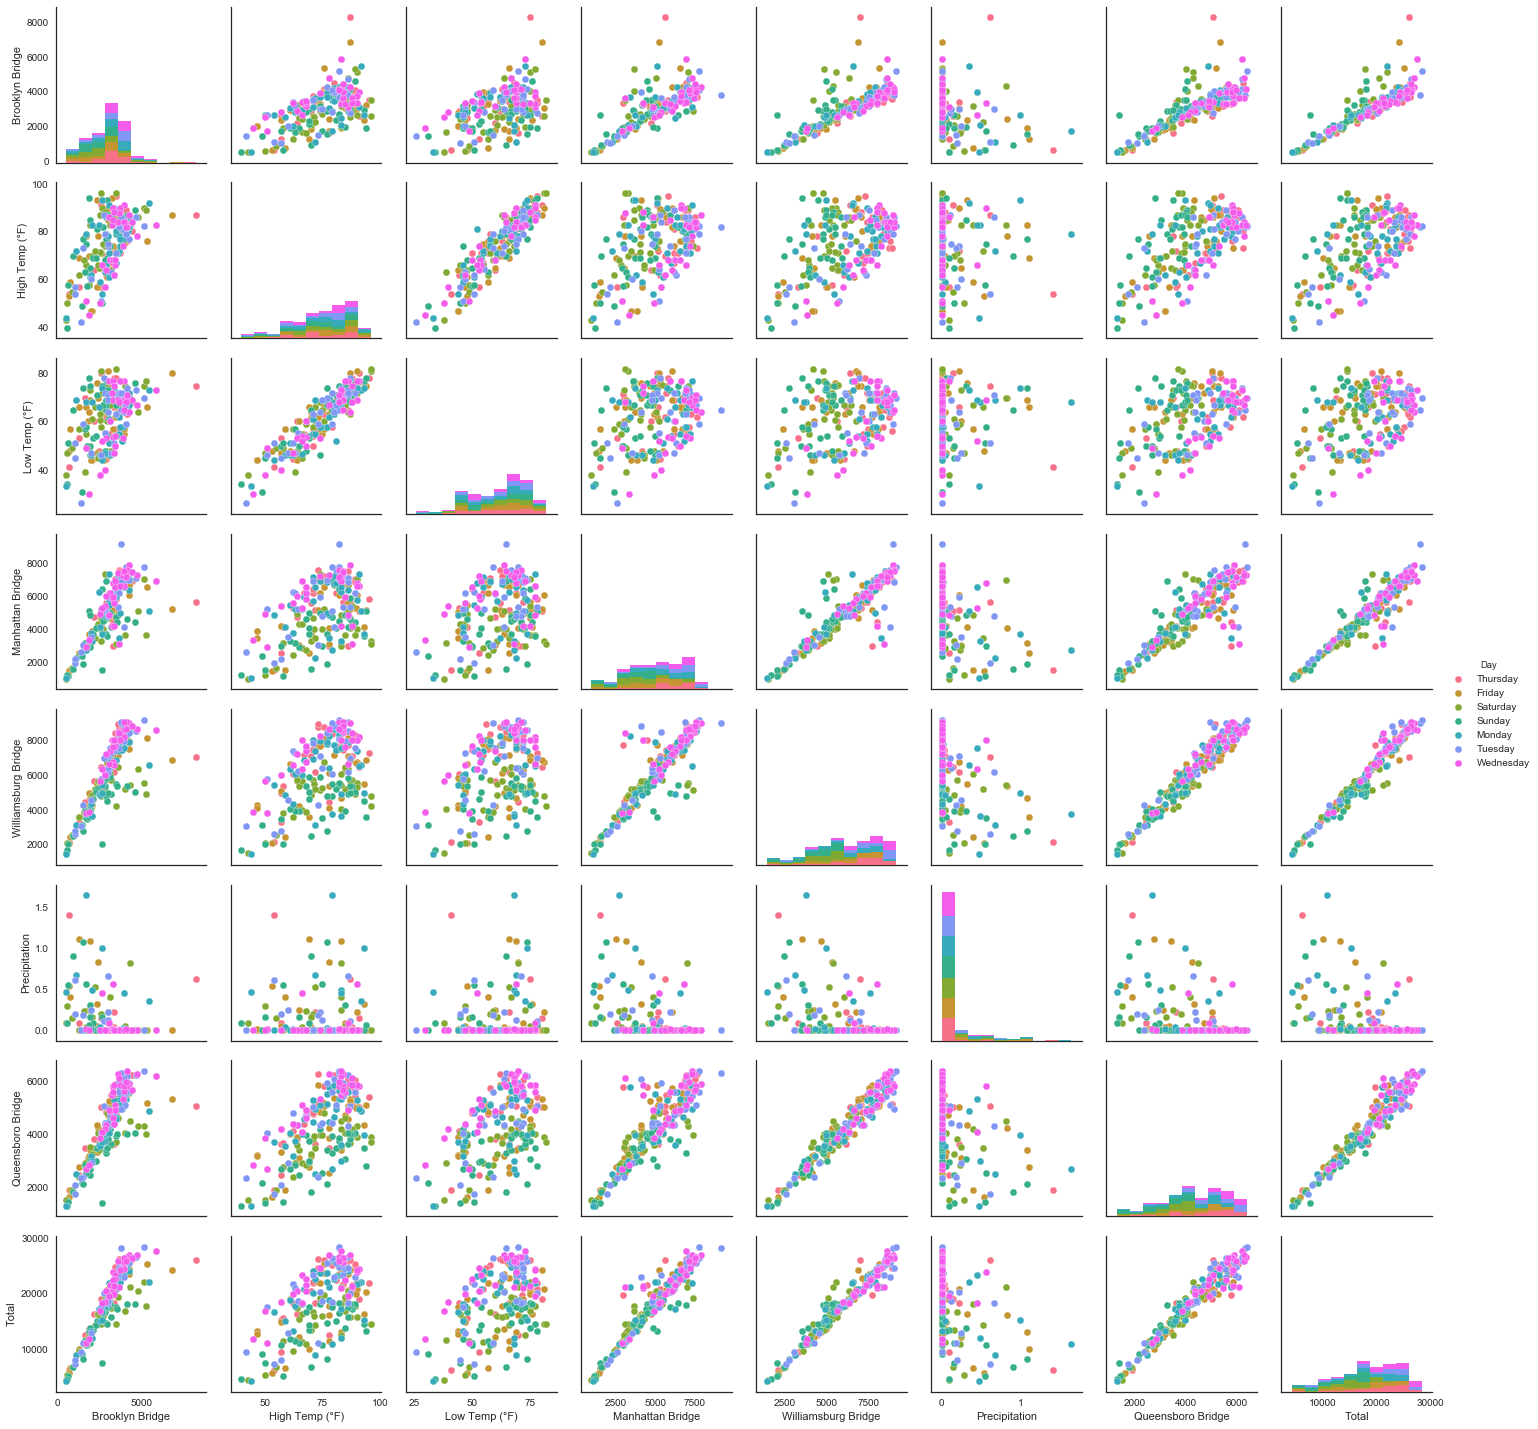

In [20]:
pp = sns.pairplot(all_data, hue='Day')
sns.set(font_scale=1.5)
 

## Time Series Analysis 

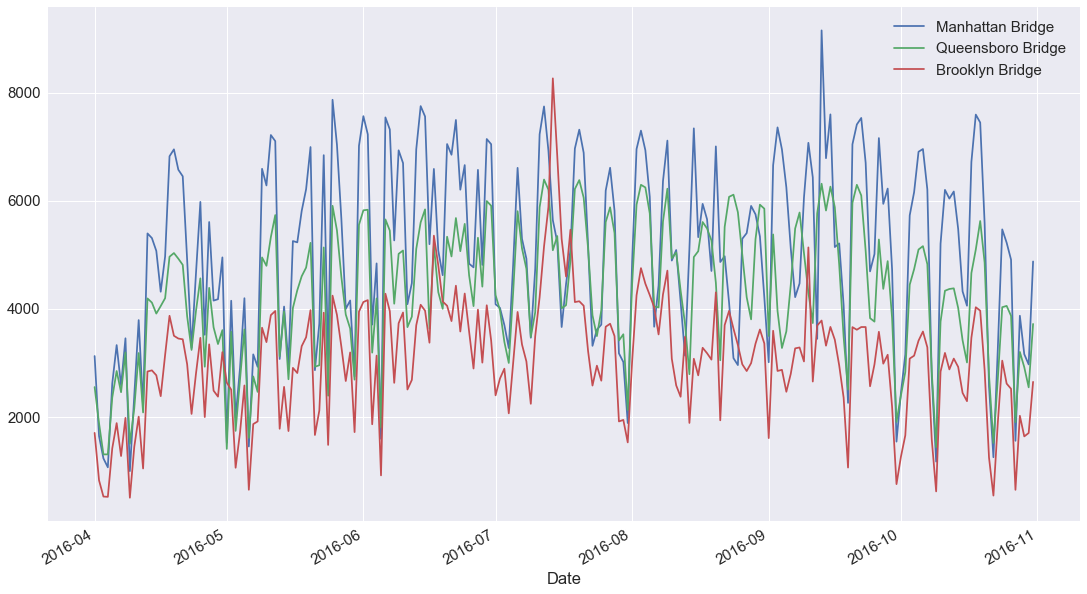

In [47]:
grp_line = all_data[['Manhattan Bridge', 'Queensboro Bridge', 'Brooklyn Bridge']]
pp = grp_line.plot()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)